In [224]:
import pandas as pd
import numpy as np
import seaborn as sns

In [225]:
data = pd.read_csv("../Datasets/UpdatedStudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [226]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [227]:
data.describe()

,math score,reading score,writing score
count,990.000000,985.000000,989.000000
mean,66.208081,69.261929,68.142568
std,15.103724,14.634171,15.199780
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [228]:
data.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [229]:
scores = ['math score' , 'reading score' , 'writing score']
for score in scores:
    data[score].fillna(data[score].mean() , inplace = True)

In [230]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [231]:
data['gender'].unique()

array(['female', 'male', 'f'], dtype=object)

In [232]:
data['gender'].replace('f' , 'female' , inplace = True)
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [233]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [234]:
# sns.boxplot(data=data[['math score', 'reading score', 'writing score']])

<Axes: >

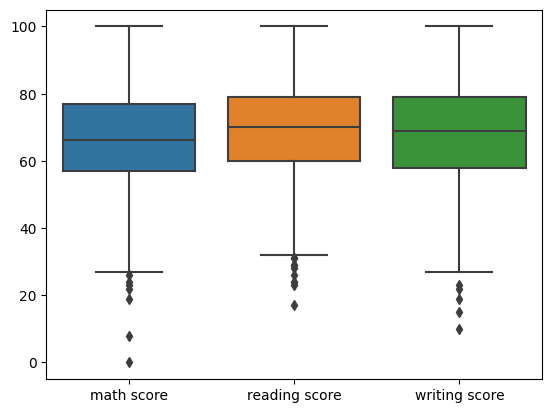

In [235]:
sns.boxplot(data = data[['math score' , 'reading score' , 'writing score']])

In [236]:
#calculating IQR for math score
Q1_math = data['math score'].quantile(0.25);
Q3_math = data['math score'].quantile(0.75)
IQR_math = Q3_math - Q1_math

print(IQR_math) 

20.0


In [237]:
Q1_reading = data['reading score'].quantile(0.25);
Q3_reading = data['reading score'].quantile(0.75)
IQR_reading = Q3_reading - Q1_reading

print(IQR_reading) 

19.0


In [238]:
Q1_writing = data['writing score'].quantile(0.25);
Q3_writing = data['writing score'].quantile(0.75)
IQR_writing = Q3_writing - Q1_writing

print(IQR_writing) 

21.0


In [239]:
#calcualting high and low for all three score and defining boundary for oultiers to exist
low_math=Q1_math-1.5*IQR_math
high_math=Q3_math+1.5*IQR_math

low_reading=Q1_reading-1.5*IQR_reading
high_reading=Q3_reading+1.5*IQR_reading

low_writing=Q1_writing-1.5*IQR_writing
high_writing=Q3_writing+1.5*IQR_writing

In [240]:
#filtering out the outliers as per Interquartile range
outliers_math = data[(data['math score'] < low_math) | (data['math score'] > high_math)]
outliers_reading = data[(data['reading score'] < low_reading) | (data['reading score'] > high_reading)]
outliers_writing = data[(data['writing score'] < low_writing) | (data['writing score'] > high_writing)]

In [241]:
#filtering the data and removing outliers
data_filtered = data[~data.index.isin(outliers_math.index)]
data_filtered2 = data_filtered[~data_filtered.index.isin(outliers_reading.index)]
data_filtered_final = data_filtered2[~data_filtered2.index.isin(outliers_writing.index)]

<Axes: >

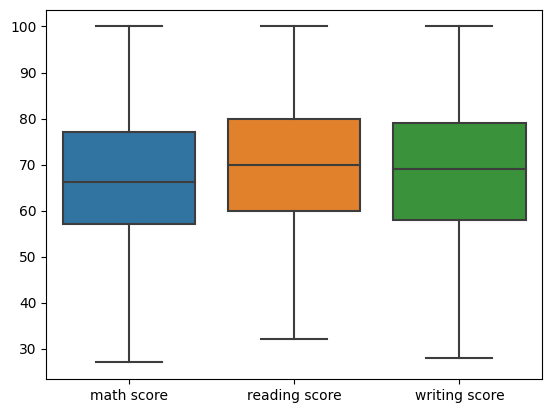

In [242]:
#This shows that outliers are removed
sns.boxplot(data_filtered_final)

In [243]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data['reading score'] = scaler.fit_transform(data['reading score'].values.reshape(-1, 1))

MIN MAX NORMALIZATION

In [248]:
data_minmax = data.copy()

In [249]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col = ['math score' , 'reading score' , 'writing score']
for score in col:
    data_minmax[score] = scaler.fit_transform(data_minmax[score].values.reshape(-1, 1))

# # x_normalized = (x - min(x)) / (max(x) - min(x))

In [250]:
data_minmax.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


<Axes: >

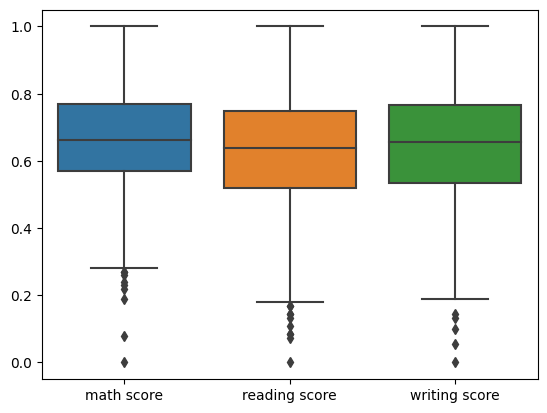

In [251]:
sns.boxplot(data_minmax)

In [253]:
outliers_math = data_minmax[(data_minmax['math score'] < 0) | (data_minmax['math score'] > 1)]
outliers_reading = data_minmax[(data_minmax['reading score'] < 0) | (data_minmax['reading score'] > 1)]
outliers_writing = data_minmax[(data_minmax['reading score'] < 0) | (data_minmax['writing score'] > 1)]

In [254]:
data_minmax1 = data_minmax[~data_minmax.index.isin(outliers_math.index)]
data_minmax2 = data_minmax1[~data_minmax1.index.isin(outliers_reading)]
data_minmax_final = data_minmax2[~data_minmax2.index.isin(outliers_writing)]

<Axes: >

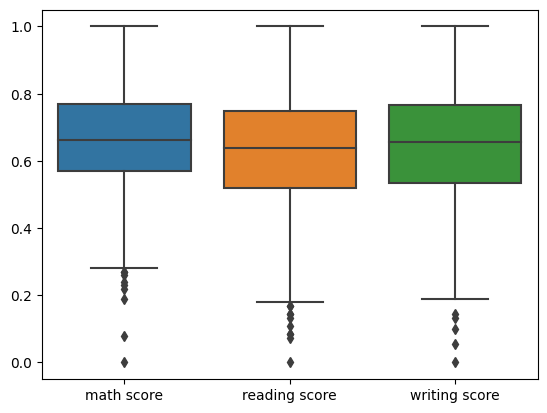

In [255]:
sns.boxplot(data_minmax_final)

In [257]:
data_minmax.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,0.662081,0.629662,0.646029
std,0.150279,0.174987,0.167954
min,0.000000,0.000000,0.000000
25%,0.570000,0.518072,0.533333
50%,0.661040,0.638554,0.655556
75%,0.770000,0.746988,0.766667
max,1.000000,1.000000,1.000000


In [258]:
#same as boxplot for minmax scalar

Z SCORE

In [259]:
zdf = data.copy()

In [260]:
from scipy import stats

In [266]:
zdf['math score'] = np.abs(stats.zscore(zdf['math score']))

<Axes: >

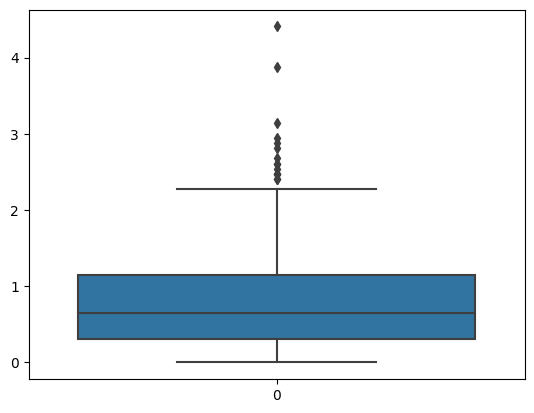

In [267]:
sns.boxplot(zdf['math score'])

In [265]:
zthreshold = 2.5

In [268]:
z_outlier_math = zdf[zdf['math score'] > zthreshold]

In [269]:
zdf_final = zdf[~zdf.index.isin(z_outlier_math.index)]

<Axes: xlabel='math score'>

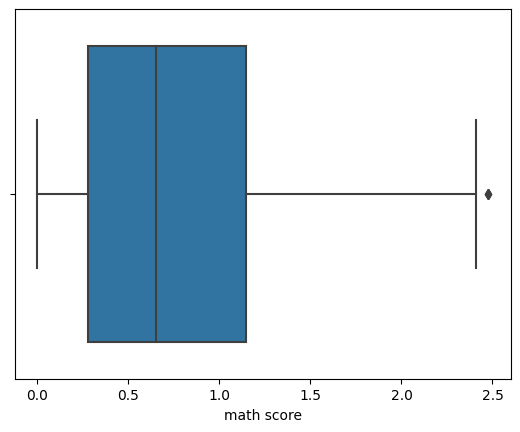

In [270]:
sns.boxplot(x = zdf_final['math score'])

In [ ]:
# Do same for all the columns